<a href="https://colab.research.google.com/github/infante-manu/unav-data-cleaning-and-preparation/blob/NO-ISSUE%2Fset-up-dev-env/Churn_Prediction_Alfaro_%7C_Infante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import DataSet


### Importing Libraries

In [2]:
import kagglehub
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Read the Data

## Food Delivery Order History Data

A Comprehensive Dataset on Restaurant Orders & Customer Preferences -> [kaggle](https://www.kaggle.com/datasets/sujalsuthar/food-delivery-order-history-data)

This dataset contains 21,321 food order records from various restaurants, capturing crucial details about customer preferences, order trends, pricing, and delivery performance. It includes 6 unique imaginary restaurants, such as Swaad, Aura Pizzas, Dilli Burger Adda, Tandoori Junction, The Chicken Junction, and Masala Junction. The dataset provides a comprehensive view of food delivery operations, making it highly valuable for data analysis, predictive modeling, and machine learning applications.

Key attributes in this dataset include restaurant details (restaurant name, subzone, city), order information (order ID, timestamps, order status, delivery time, distance, number of items), pricing breakdown (bill subtotal, packaging charges, total cost, discounts), and customer feedback (ratings, reviews, order cancellations). It also tracks key delivery insights such as rider wait time, preparation duration, and distance traveled, which can be useful for logistics optimization and demand forecasting.

This dataset can be leveraged for predicting delivery times, analyzing customer behavior, identifying top-performing restaurants, and optimizing pricing strategies. It is particularly useful for food delivery platforms, restaurant managers, and data scientists looking to improve delivery efficiency and customer satisfaction. With rich historical data, this dataset can also be used for building recommendation systems, identifying peak ordering times, and enhancing user experience in food delivery applications.

In [33]:
# Get Data
path = kagglehub.dataset_download("sujalsuthar/food-delivery-order-history-data")
df = pd.read_csv(path + "/order_history_kaggle_data.csv")

In [34]:
# Rename of the columns names for easy use
df.columns = df.columns.\
    str.lower().\
    str.replace('/', '').\
    str.replace('(', '').\
    str.replace(')', '').\
    str.replace(' ', '_')
    
df.head(10)

,restaurant_id,restaurant_name,subzone,city,order_id,order_placed_at,order_status,delivery,distance,items_in_order,...,rating,review,cancellation__rejection_reason,restaurant_compensation_cancellation,restaurant_penalty_rejection,kpt_duration_minutes,rider_wait_time_minutes,order_ready_marked,customer_complaint_tag,customer_id
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,"11:38 PM, September 10 2024",Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",...,NaN,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,"11:34 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",...,NaN,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,"03:52 PM, September 10 2024",Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,...,NaN,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,"03:45 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",...,4.0,NaN,NaN,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,"03:04 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",...,NaN,NaN,NaN,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...
5,20320607,Swaad,Sector 4,Delhi NCR,6164725184,"12:28 PM, September 10 2024",Delivered,Zomato Delivery,1km,"1 x Grilled Chicken Jamaican Tangdi, 1 x Bone ...",...,5.0,NaN,NaN,NaN,NaN,20.48,1.0,Correctly,NaN,4103fd4f3ee2166d322e76fabd420ae15f14a2816ca5a3...
6,20320607,Swaad,Sector 4,Delhi NCR,6151460444,"12:03 AM, September 10 2024",Delivered,Zomato Delivery,6km,1 x Bone in Jamaican Grilled Chicken,...,NaN,NaN,NaN,NaN,NaN,10.53,7.0,Incorrectly,NaN,24d7ca74eb1efe217e88062d2519403ba11d62f5953186...
7,20320607,Swaad,Sector 4,Delhi NCR,6167255032,"10:54 PM, September 09 2024",Delivered,Zomato Delivery,2km,1 x Bone in Angara Grilled Chicken,...,NaN,NaN,NaN,NaN,NaN,9.68,1.5,Correctly,NaN,fa1710c1c41dd4f29b810b78f8e7c08a356ca0fdc39307...
8,20320607,Swaad,Sector 4,Delhi NCR,6167184688,"10:51 PM, September 09 2024",Delivered,Zomato Delivery,1km,"1 x Fried Chicken Angara Tender, 1 x Angara Rice",...,NaN,NaN,NaN,NaN,NaN,15.20,8.3,Correctly,NaN,c521ccf21e7bb2207c3f08d578b6e028d2c3b25986cb35...
9,20320607,Swaad,Sector 4,Delhi NCR,6163081676,"03:22 PM, September 09 2024",Delivered,Zomato Delivery,<1km,1 x Grilled Chicken Peri Peri Tangdi,...,NaN,NaN,NaN,NaN,NaN,11.38,3.7,Correctly,NaN,ac2ee09679412d4248884cdfd7637d9b3529eeac0e2f27...


# Understanding and examinate Data

| Column Name                                          | Description                                                     |
|------------------------------------------------------|-----------------------------------------------------------------|
| `Restaurant ID`                                      | Unique ID assigned to each restaurant                           |
| `Restaurant name`                                    | Name of the restaurant (e.g., Swaad, Aura Pizzas, Dilli Burger Adda) |
| `Subzone`                                            | Location subzone of the restaurant                              |
| `City`                                               | City where the restaurant is located                            |
| `Order ID`                                           | Unique identifier for each order                                |
| `Order Placed At`                                    | Timestamp when the order was placed                             |
| `Order Status`                                       | Status of the order (Delivered, Canceled, Rejected, In Progress)|
| `Delivery`                                           | Mode of delivery (Zomato Delivery, Self Pickup, etc.)           |
| `Distance`                                           | Distance between restaurant and customer (e.g., <1km, 2km, 5km) |
| `Items in order`                                     | List of food items ordered                                      |
| `Instructions`                                       | Special instructions provided by the customer                   |
| `Discount construct`                                 | Structure/details of discounts applied                          |
| `Bill subtotal`                                      | Subtotal amount before additional charges/discounts             |
| `Packaging charges`                                  | Additional packaging fee applied                                |
| `Restaurant discount (Promo)`                        | Discount provided by the restaurant as promotional offer        |
| `Restaurant discount (Flat offs, Freebies & others)` | Discounts by restaurant (flat rates, freebies, others)          |
| `Gold discount`                                      | Special discount for Zomato Gold members                        |
| `Brand pack discount`                                | Discount provided for brand-specific packaging                  |
| `Total`                                              | Final total payable amount after discounts and charges          |
| `Rating`                                             | Customer's rating for the order                                 |
| `Review`                                             | Customer's textual feedback/review                              |
| `Cancellation / Rejection reason`                    | Reason provided for order cancellation or rejection             |
| `Restaurant compensation (Cancellation)`             | Amount compensated by restaurant for cancellations              |
| `Restaurant penalty (Rejection)`                     | Penalty charged to restaurant for order rejection               |
| `KPT duration (minutes)`                             | Kitchen Preparation Time duration (minutes)                     |
| `Rider wait time (minutes)`                          | Duration rider waited at restaurant (minutes)                   |
| `Order Ready Marked`                                 | Tag Indicating if the Order Ready was marked (Correctly, Incorrectly, Missed)                       |
| `Customer complaint tag`                             | Tag indicating type of customer complaint                       |
| `Customer ID`                                        | Unique identifier for the customer                              |


## Fixing data types

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21321 entries, 0 to 21320
Data columns (total 29 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   restaurant_id                                     21321 non-null  int64  
 1   restaurant_name                                   21321 non-null  object 
 2   subzone                                           21321 non-null  object 
 3   city                                              21321 non-null  object 
 4   order_id                                          21321 non-null  int64  
 5   order_placed_at                                   21321 non-null  object 
 6   order_status                                      21321 non-null  object 
 7   delivery                                          21321 non-null  object 
 8   distance                                          21321 non-null  object 
 9   items_in_order   

In [36]:
df

,restaurant_id,restaurant_name,subzone,city,order_id,order_placed_at,order_status,delivery,distance,items_in_order,...,rating,review,cancellation__rejection_reason,restaurant_compensation_cancellation,restaurant_penalty_rejection,kpt_duration_minutes,rider_wait_time_minutes,order_ready_marked,customer_complaint_tag,customer_id
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,"11:38 PM, September 10 2024",Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",...,NaN,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,"11:34 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",...,NaN,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,"03:52 PM, September 10 2024",Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,...,NaN,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,"03:45 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",...,4.0,NaN,NaN,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,"03:04 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",...,NaN,NaN,NaN,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21316,21467440,The Chicken Junction,Chittaranjan Park,Delhi NCR,6568490993,"03:26 AM, January 30 2025",Delivered,Zomato Delivery,5km,1 x Fried Chicken Desi Peri Peri Bites (Bone),...,NaN,NaN,NaN,NaN,NaN,14.32,9.0,Correctly,Wrong item(s) delivered,c6ee80eb35f2ef1630fd93ea88f8c0ac27eff57229a6d5...
21317,21467440,The Chicken Junction,Chittaranjan Park,Delhi NCR,6564842673,"02:44 AM, January 29 2025",Delivered,Zomato Delivery,5km,1 x Fried Chicken 65 Masala Boneless Bites,...,NaN,NaN,NaN,NaN,NaN,NaN,10.8,Missed,NaN,d2a0153ba6512894c1bebe974f6898ba10df50abc2c954...
21318,21523055,Masala Junction,Sector 4,Delhi NCR,6553527557,"10:05 PM, January 24 2025",Delivered,Zomato Delivery,8km,1 x Korean Fried Chicken Slider,...,5.0,Yummy food! Delicious food! Lip smacking food!...,NaN,NaN,NaN,16.27,9.4,Incorrectly,NaN,0b6168cbaf96aa5a0ae6b46d19d83ec9cad0d9508d43d7...
21319,21523055,Masala Junction,Sector 4,Delhi NCR,6541170157,"02:27 PM, January 21 2025",Delivered,Zomato Delivery,9km,1 x Ooh Saucy Fries,...,4.0,The peri peri fries were truly so tasty and de...,NaN,NaN,NaN,12.77,1.3,Correctly,NaN,410b3e056e511e3423d9497c629ca897f91cace2a2a732...


In [37]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df["distance"] = df["distance"].\
    str.replace("<1", "0.5").\
    str.replace("km", "").astype(float)

/var/folders/rt/18741j210gv901hc68y39qm80000gp/T/ipykernel_57268/3850234797.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])


In [69]:
df = df.sort_values("order_placed_at")
df["cum_count"] =  df.groupby("customer_id").cumcount()
df["orders_after"] = df[::-1].groupby("customer_id").cumcount() # Count how many orders are placed after each order
df["has_not_reorder"] = df["orders_after"] == 0 # Flag if there is at least one order after this order
df['rating'] = df['rating'].astype('Int64').astype(str)
df

,restaurant_id,restaurant_name,subzone,city,order_id,order_placed_at,order_status,delivery,distance,items_in_order,...,restaurant_compensation_cancellation,restaurant_penalty_rejection,kpt_duration_minutes,rider_wait_time_minutes,order_ready_marked,customer_complaint_tag,customer_id,cum_count,orders_after,has_not_reorder
584,20635699,Aura Pizzas,Greater Kailash 2 (GK2),Delhi NCR,6139801139,2024-09-01 00:13:00,Delivered,Zomato Delivery,3.0,"1 x Indian Masala Fries, 1 x Bageecha Pizza",...,NaN,NaN,19.58,1.1,Correctly,Poor taste or quality,dee126cd12abfca633ee0e84230782dab2850350b11de0...,0,0,True
835,20659868,Aura Pizzas,Sector 4,Delhi NCR,6134954975,2024-09-01 01:52:00,Delivered,Zomato Delivery,2.0,1 x Chilli Cheese Garlic Bread,...,NaN,NaN,10.87,1.1,Correctly,NaN,3c60986ba1210cdc6d3eea3e7a702c74f1303ac2d08140...,0,0,True
834,20659868,Aura Pizzas,Sector 4,Delhi NCR,6140763362,2024-09-01 01:54:00,Delivered,Zomato Delivery,8.0,"1 x Margherita Pizza, 2 x Herbed Potato, 1 x M...",...,NaN,NaN,15.82,1.2,Correctly,NaN,6858219c0daea36ae34eab06276647584f3c0c4f2fc252...,0,0,True
127,20320607,Swaad,Sector 4,Delhi NCR,6128060895,2024-09-01 02:10:00,Delivered,Zomato Delivery,2.0,1 x Bone in Kabuli Grilled Chicken,...,NaN,NaN,14.87,3.0,Incorrectly,NaN,3a25f367ff62cc2e63d88f8c4d152823bd4cf6512ee29a...,0,0,True
833,20659868,Aura Pizzas,Sector 4,Delhi NCR,6139906104,2024-09-01 02:17:00,Delivered,Zomato Delivery,6.0,1 x All About Chicken Pizza,...,NaN,NaN,13.00,1.0,Correctly,NaN,330db10a58b705b220dd0f2c1c4c95708a24332fd1fa26...,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19805,20320607,Swaad,Sector 4,Delhi NCR,6568558124,2025-01-31 22:47:00,Delivered,Zomato Delivery,4.0,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",...,NaN,NaN,11.60,1.0,Correctly,NaN,653bd1503c86029c98e635aeac9bcdaf613f8663d5d06d...,0,0,True
20131,20635699,Aura Pizzas,Greater Kailash 2 (GK2),Delhi NCR,6573391990,2025-01-31 23:04:00,Delivered,Zomato Delivery,6.0,1 x Murgh Amritsari Seekh Pizza,...,NaN,NaN,16.50,1.0,Correctly,NaN,629d0063d859ab20b2ea8743dbdd54a577a4b126a3a47c...,0,0,True
21260,21309083,Swaad,Sector 135,Delhi NCR,6572516856,2025-01-31 23:20:00,Delivered,Zomato Delivery,2.0,"1 x Bone in Peri Peri Grilled Chicken, 1 x Bon...",...,NaN,NaN,17.77,0.3,Correctly,NaN,4c3a0b7788843c09212eeb84bc514f22408b6236e1243f...,0,0,True
21093,20968206,Dilli Burger Adda,Greater Kailash 2 (GK2),Delhi NCR,6569221531,2025-01-31 23:26:00,Delivered,Zomato Delivery,7.0,"1 x Grilled Chicken Dirty Burger, 1 x Mutton S...",...,NaN,NaN,17.18,2.1,Correctly,NaN,13140775581a27d904637c025e319922c4af1fc9de7a9d...,0,0,True


In [57]:
df.loc[
    df["customer_id"] == df.query("orders_after == 8")["customer_id"].iloc[0], :
    ].\
    sort_values("order_placed_at").\
    loc[:, ["order_placed_at", "cum_count", "has_not_reorder", "orders_after"]]
df = df.query("cum_count == 0") # Keep only the first order of each customer

In [58]:
df.describe()

,restaurant_id,order_id,order_placed_at,distance,bill_subtotal,packaging_charges,restaurant_discount_promo,"restaurant_discount_flat_offs,_freebies_&_others",gold_discount,brand_pack_discount,total,rating,restaurant_compensation_cancellation,restaurant_penalty_rejection,kpt_duration_minutes,rider_wait_time_minutes,cum_count,orders_after
count,1.160700e+04,1.160700e+04,11607,11607.000000,11607.000000,11607.000000,11607.000000,11607.000000,11607.000000,11607.000000,11607.000000,1432.000000,81.000000,2.0,11456.000000,11510.000000,11607.0,11607.000000
mean,2.075999e+07,6.327702e+09,2024-11-06 17:34:50.323080960,4.268459,759.884876,32.944522,68.223392,31.878370,0.090540,2.057160,690.579944,4.278631,353.896790,0.0,17.480703,4.913371,0.0,0.836909
min,2.032061e+07,6.086767e+09,2024-09-01 00:13:00,0.500000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000,1.000000,83.580000,0.0,0.000000,0.100000,0.0,0.000000
25%,2.063570e+07,6.211548e+09,2024-09-26 21:22:00,2.000000,460.000000,18.750000,0.000000,0.000000,0.000000,0.000000,394.905000,4.000000,202.680000,0.0,13.420000,1.000000,0.0,0.000000
50%,2.065987e+07,6.318372e+09,2024-11-01 22:26:00,4.000000,635.000000,28.950000,90.000000,0.000000,0.000000,0.000000,607.950000,5.000000,330.370000,0.0,16.400000,3.100000,0.0,0.000000
75%,2.088271e+07,6.432030e+09,2024-12-13 23:40:30,6.000000,907.000000,40.250000,100.000000,0.000000,0.000000,0.000000,838.950000,5.000000,433.410000,0.0,20.170000,7.500000,0.0,1.000000
max,2.152306e+07,6.573392e+09,2025-01-31 23:39:00,21.000000,16080.000000,603.000000,4020.000000,3365.000000,108.400000,425.500000,12663.000000,5.000000,1078.850000,0.0,90.870000,73.800000,0.0,60.000000
std,2.438179e+05,1.246892e+08,NaN,3.056310,511.645179,23.055119,89.188409,124.766607,2.546012,14.204618,482.912121,1.244927,206.175012,0.0,6.589750,5.122958,0.0,2.028240


## Check the statistical values of features

In [67]:
numeric_features = df.select_dtypes(include=['int64', 'float64'])
categorical_features = df.select_dtypes(include=['object'])

In [68]:
numeric_features

,restaurant_id,order_id,distance,bill_subtotal,packaging_charges,restaurant_discount_promo,"restaurant_discount_flat_offs,_freebies_&_others",gold_discount,brand_pack_discount,total,rating,restaurant_compensation_cancellation,restaurant_penalty_rejection,kpt_duration_minutes,rider_wait_time_minutes,cum_count,orders_after
584,20635699,6139801139,3.0,788.0,33.80,112.0,0.0,0.0,0.0,709.80,1.0,NaN,NaN,19.58,1.1,0,0
835,20659868,6134954975,2.0,259.0,8.00,99.0,0.0,0.0,0.0,168.00,NaN,NaN,NaN,10.87,1.1,0,0
834,20659868,6140763362,8.0,1204.0,55.55,93.0,0.0,0.0,0.0,1166.55,NaN,NaN,NaN,15.82,1.2,0,1
127,20320607,6128060895,2.0,310.0,10.50,100.0,0.0,0.0,0.0,220.50,NaN,NaN,NaN,14.87,3.0,0,1
833,20659868,6139906104,6.0,659.0,28.30,93.0,0.0,0.0,0.0,594.30,NaN,NaN,NaN,13.00,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19805,20320607,6568558124,4.0,310.0,15.50,0.0,0.0,0.0,0.0,325.50,NaN,NaN,NaN,11.60,1.0,0,0
20131,20635699,6573391990,6.0,839.0,20.98,0.0,419.5,0.0,0.0,440.48,NaN,NaN,NaN,16.50,1.0,0,0
21260,21309083,6572516856,2.0,585.0,29.25,0.0,0.0,0.0,0.0,614.25,NaN,NaN,NaN,17.77,0.3,0,0
21093,20968206,6569221531,7.0,770.0,19.25,0.0,385.0,0.0,0.0,404.25,NaN,NaN,NaN,17.18,2.1,0,0


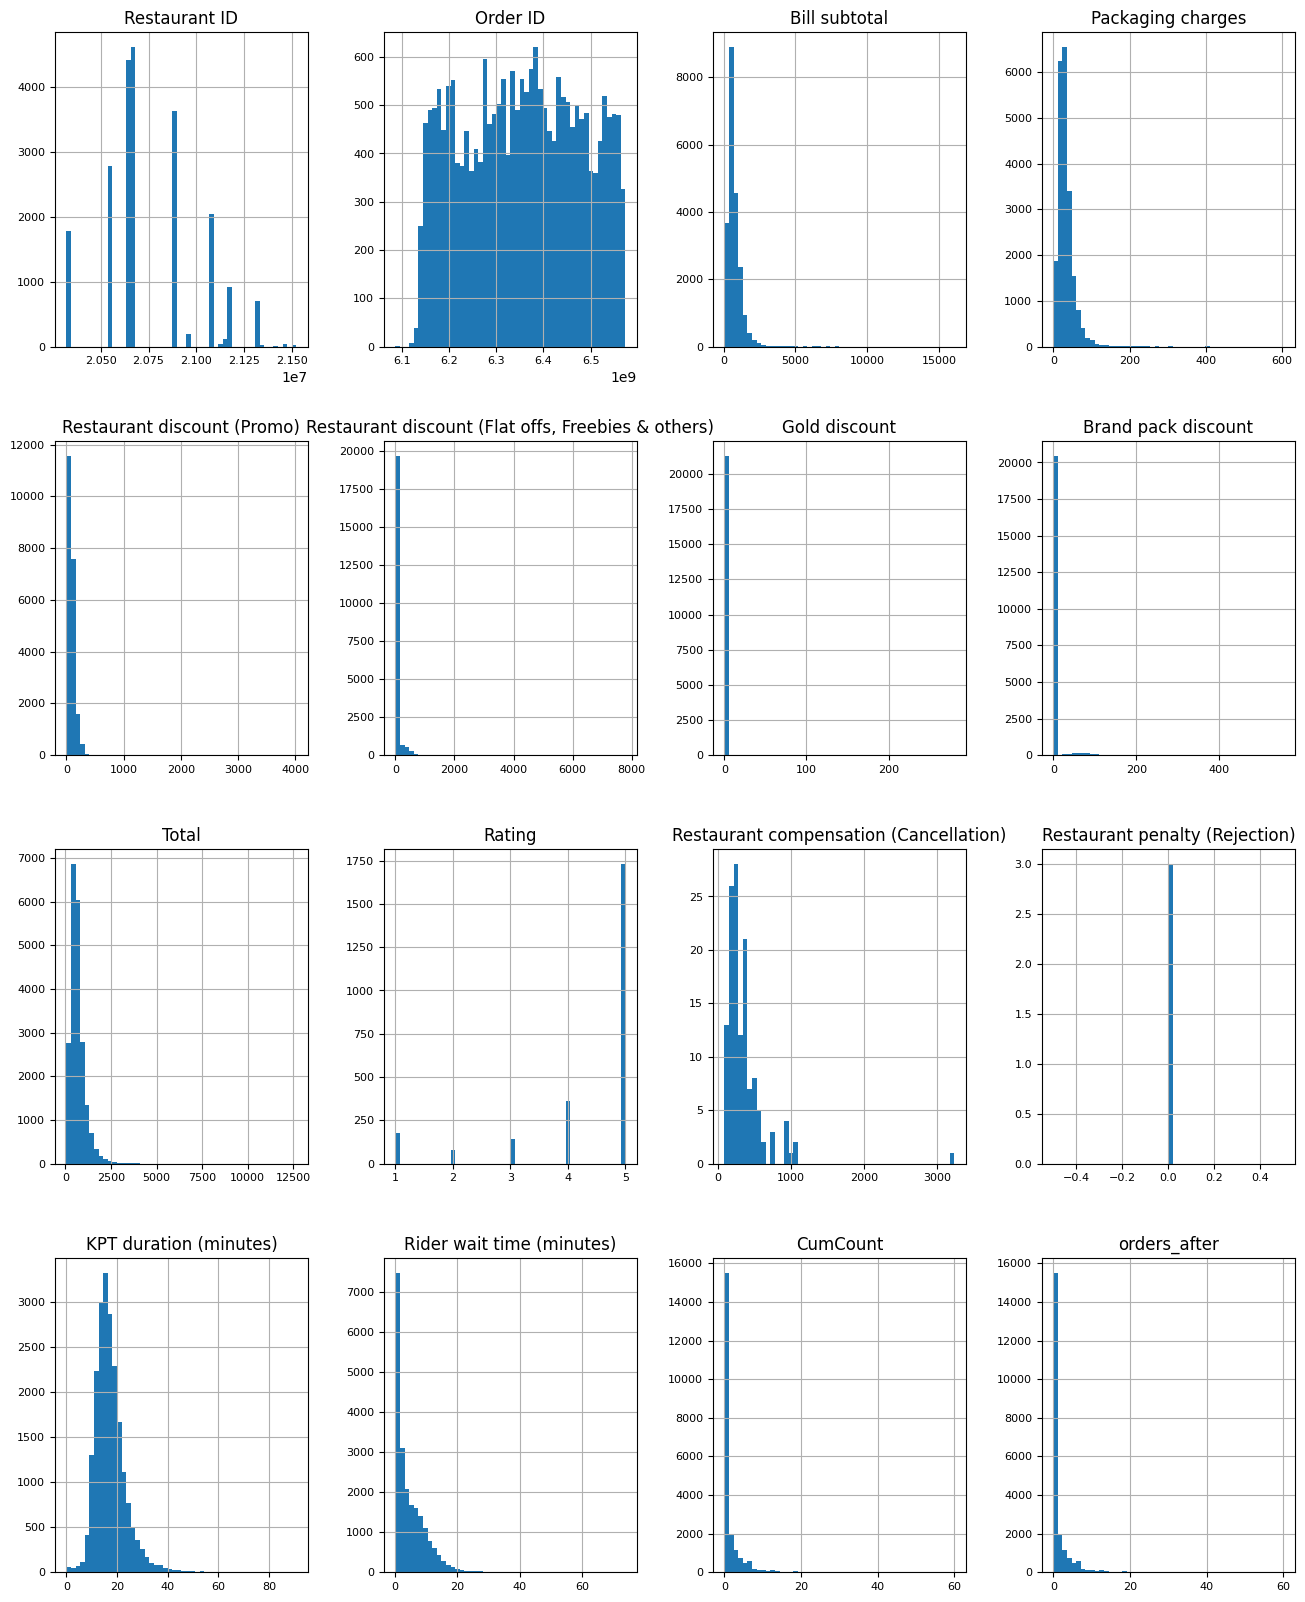

In [ ]:

df.numericas.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

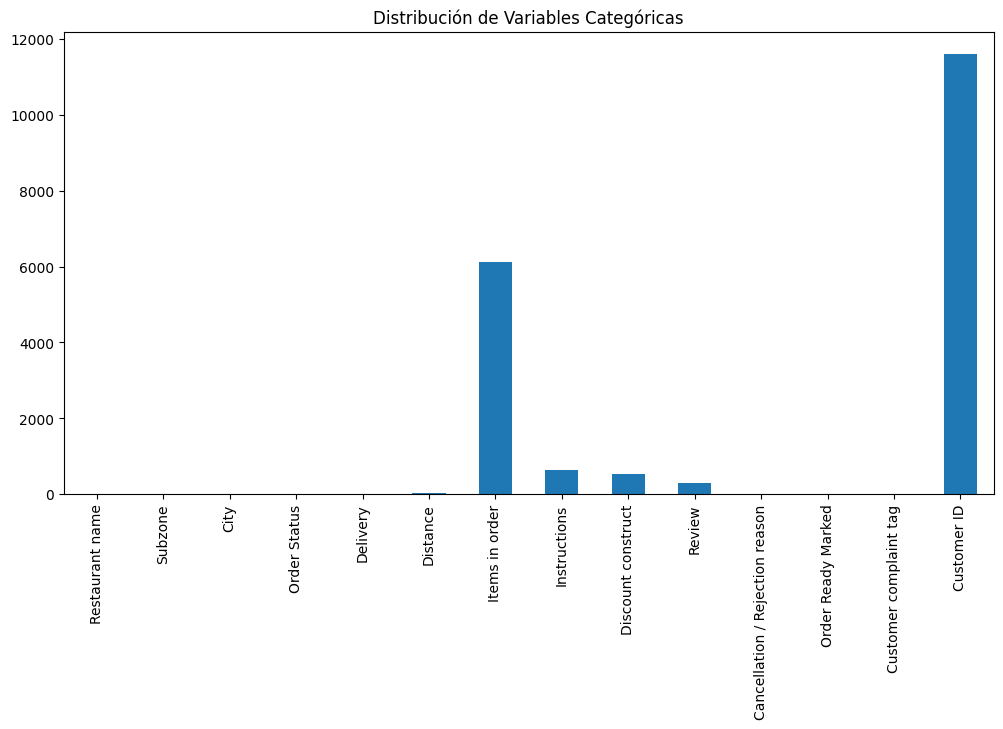

In [ ]:
df.categoricas.nunique().plot(kind='bar', figsize=(12, 6), title="Distribución de Variables Categóricas")
plt.show()


In [ ]:
print(df.categoricas.nunique())


Restaurant name                        6
Subzone                                8
City                                   1
Order Status                           6
Delivery                               1
Distance                              22
Items in order                      6123
Instructions                         631
Discount construct                   527
Review                               293
Cancellation / Rejection reason        5
Order Ready Marked                     3
Customer complaint tag                 5
Customer ID                        11607
dtype: int64


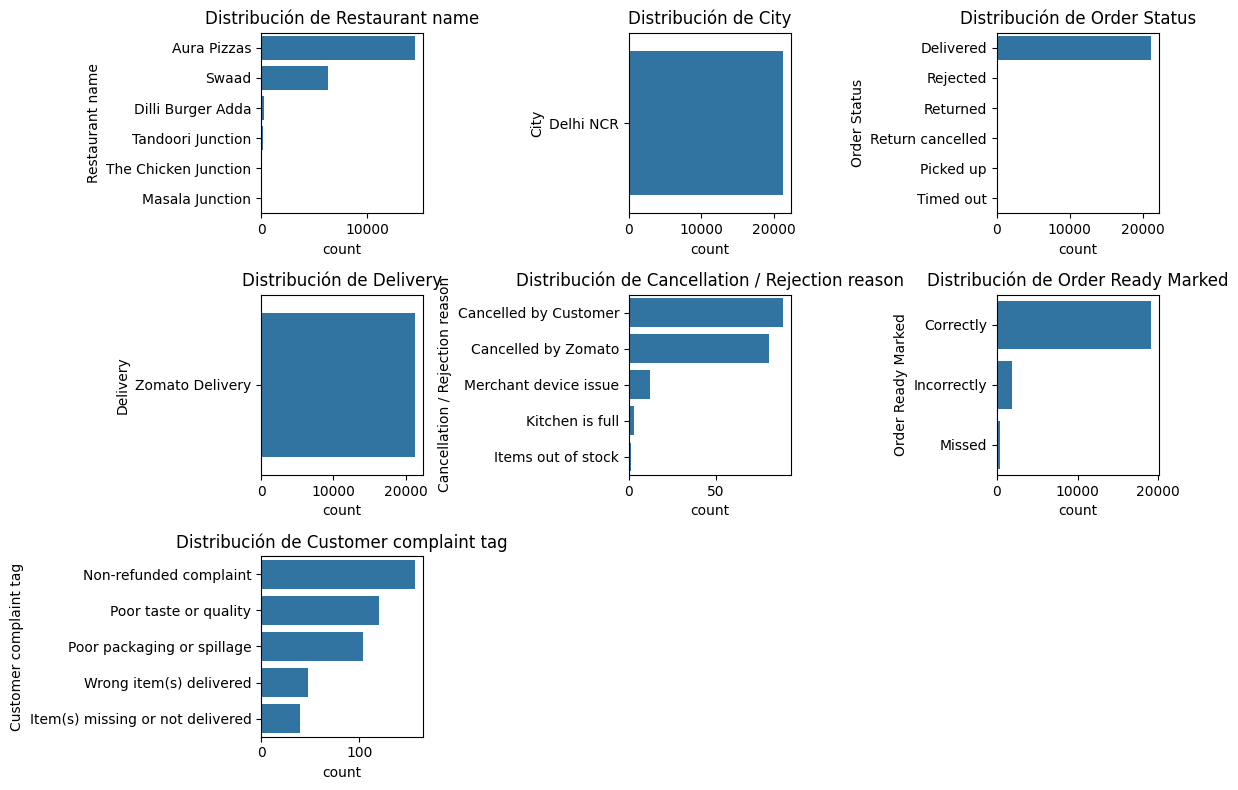

In [ ]:
categorical_limited = df.categoricas.nunique()
columns_to_plot = categorical_limited[categorical_limited <= 7].index

# Graficar distribución de cada variable filtrada
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)  # Ajustar el tamaño si hay más de 6
    sns.countplot(y=df.categoricas[col], order=df.categoricas[col].value_counts().index)
    plt.title(f'Distribución de {col}')

plt.tight_layout()
plt.show()

In [ ]:
print(df.categoricas.nunique())

Restaurant name                        6
Subzone                                8
City                                   1
Order Status                           6
Delivery                               1
Distance                              22
Items in order                      6123
Instructions                         631
Discount construct                   527
Review                               293
Cancellation / Rejection reason        5
Order Ready Marked                     3
Customer complaint tag                 5
Customer ID                        11607
dtype: int64


# Creacion Varibles y exploracion


In [ ]:
#compra_frecuencia = df.groupby('Customer ID').size().reset_index(name='Total_Compras')
#print(compra_frecuencia.sort_values('Total_Compras', ascending=False))

                                             Customer ID  Total_Compras
8899   c521ccf21e7bb2207c3f08d578b6e028d2c3b25986cb35...             61
8265   b64eade2d814bda0a3b16234e44400a4a9c0c44e5d6738...             38
4958   6c24d2044b9eb120a8ad72e45545bc27569094def10dcf...             31
2377   33c69b7971ae28ea3dd843fb16892339784847f361efd8...             31
3815   533c3ddab33a37b1d589e5cf1ff48d6aa10a2a8f7b9c5a...             29
...                                                  ...            ...
4640   64e96933bc3054c669ad18db47b7eefcd3eede2c16754e...              1
4644   64feac04a14dda437f12d23190ae71ee498da9a657d3fe...              1
4647   650325b3309abfa25086302a61b566b3fa85edccd3827d...              1
4648   650b7c1343cade1e11de8690da5172082ef599811dda71...              1
11606  fff9f622424297b6dc5a5a66725896d4263a9e299900e5...              1

[11607 rows x 2 columns]


In [ ]:
#compra_frecuencia['Recompra'] = (compra_frecuencia['Total_Compras'] >= 2).astype(int)


In [ ]:
# Paso 3: Unir la variable "Recompra" al dataset original sin eliminar compras adicionales
#df_target = df.merge(compra_frecuencia[['Customer ID', 'Recompra']], on='Customer ID', how='left')

In [ ]:
#df_target.shape

(21321, 30)

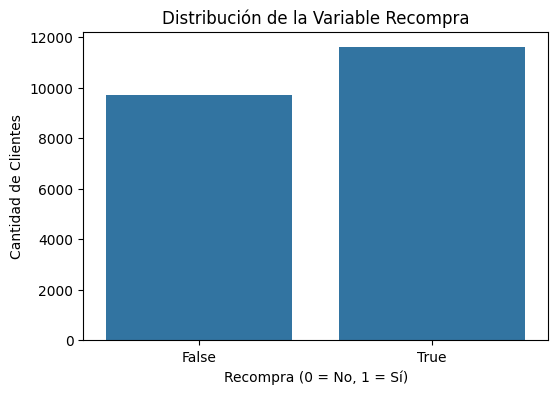

In [ ]:
# Contar la cantidad de clientes en cada clase
#plt.figure(figsize=(6,4))
#sns.countplot(x=df['has_not_reorder'])
#plt.title("Distribución de la Variable Recompra")
#plt.xlabel("Recompra (0 = No, 1 = Sí)")
#plt.ylabel("Cantidad de Clientes")
#plt.show()

In [ ]:
# Plot with FacetGrid
df_filtered = df[df["CumCount"] <= 11]


In [ ]:
df_filtered

,Restaurant ID,Restaurant name,Subzone,City,Order ID,Order Placed At,Order Status,Delivery,Distance,Items in order,...,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,Customer complaint tag,Customer ID,CumCount,orders_after,has_not_reorder
584,20635699,Aura Pizzas,Greater Kailash 2 (GK2),Delhi NCR,6139801139,2024-09-01 00:13:00,Delivered,Zomato Delivery,3km,"1 x Indian Masala Fries, 1 x Bageecha Pizza",...,NaN,NaN,19.58,1.1,Correctly,Poor taste or quality,dee126cd12abfca633ee0e84230782dab2850350b11de0...,0,0,True
835,20659868,Aura Pizzas,Sector 4,Delhi NCR,6134954975,2024-09-01 01:52:00,Delivered,Zomato Delivery,2km,1 x Chilli Cheese Garlic Bread,...,NaN,NaN,10.87,1.1,Correctly,NaN,3c60986ba1210cdc6d3eea3e7a702c74f1303ac2d08140...,0,0,True
834,20659868,Aura Pizzas,Sector 4,Delhi NCR,6140763362,2024-09-01 01:54:00,Delivered,Zomato Delivery,8km,"1 x Margherita Pizza, 2 x Herbed Potato, 1 x M...",...,NaN,NaN,15.82,1.2,Correctly,NaN,6858219c0daea36ae34eab06276647584f3c0c4f2fc252...,0,1,False
127,20320607,Swaad,Sector 4,Delhi NCR,6128060895,2024-09-01 02:10:00,Delivered,Zomato Delivery,2km,1 x Bone in Kabuli Grilled Chicken,...,NaN,NaN,14.87,3.0,Incorrectly,NaN,3a25f367ff62cc2e63d88f8c4d152823bd4cf6512ee29a...,0,1,False
833,20659868,Aura Pizzas,Sector 4,Delhi NCR,6139906104,2024-09-01 02:17:00,Delivered,Zomato Delivery,6km,1 x All About Chicken Pizza,...,NaN,NaN,13.00,1.0,Correctly,NaN,330db10a58b705b220dd0f2c1c4c95708a24332fd1fa26...,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20790,20882652,Aura Pizzas,DLF Phase 1,Delhi NCR,6571788500,2025-01-31 23:30:00,Delivered,Zomato Delivery,1km,1 x Murgh Amritsari Seekh Pizza,...,NaN,NaN,19.13,0.6,Correctly,NaN,5ff8f350ff98d5f9f326844bd932dac2abe6623778cd08...,1,0,True
19804,20320607,Swaad,Sector 4,Delhi NCR,6572395200,2025-01-31 23:39:00,Delivered,Zomato Delivery,1km,"1 x Bone in Peri Peri Grilled Chicken, 1 x Bon...",...,NaN,NaN,18.08,1.1,Correctly,NaN,2ce811fbbe3fedd231cd041024e9b30f2d827ab72f4b5b...,0,0,True
20789,20882652,Aura Pizzas,DLF Phase 1,Delhi NCR,6567469287,2025-01-31 23:55:00,Delivered,Zomato Delivery,3km,1 x Tripple Cheese Pizza,...,NaN,NaN,16.32,1.0,Correctly,NaN,1b997da7e93deac50d1ecb1dc7457e401c873507746f02...,3,0,True
19940,20554001,Swaad,Greater Kailash 2 (GK2),Delhi NCR,6571201675,2025-01-31 23:56:00,Delivered,Zomato Delivery,2km,"1 x Grilled Chicken Peri Peri Boneless Breast,...",...,NaN,NaN,22.55,0.3,Correctly,NaN,e94b1027ad1e4402a2feb19b4d10b0de8d3b0ac3e139cf...,1,0,True


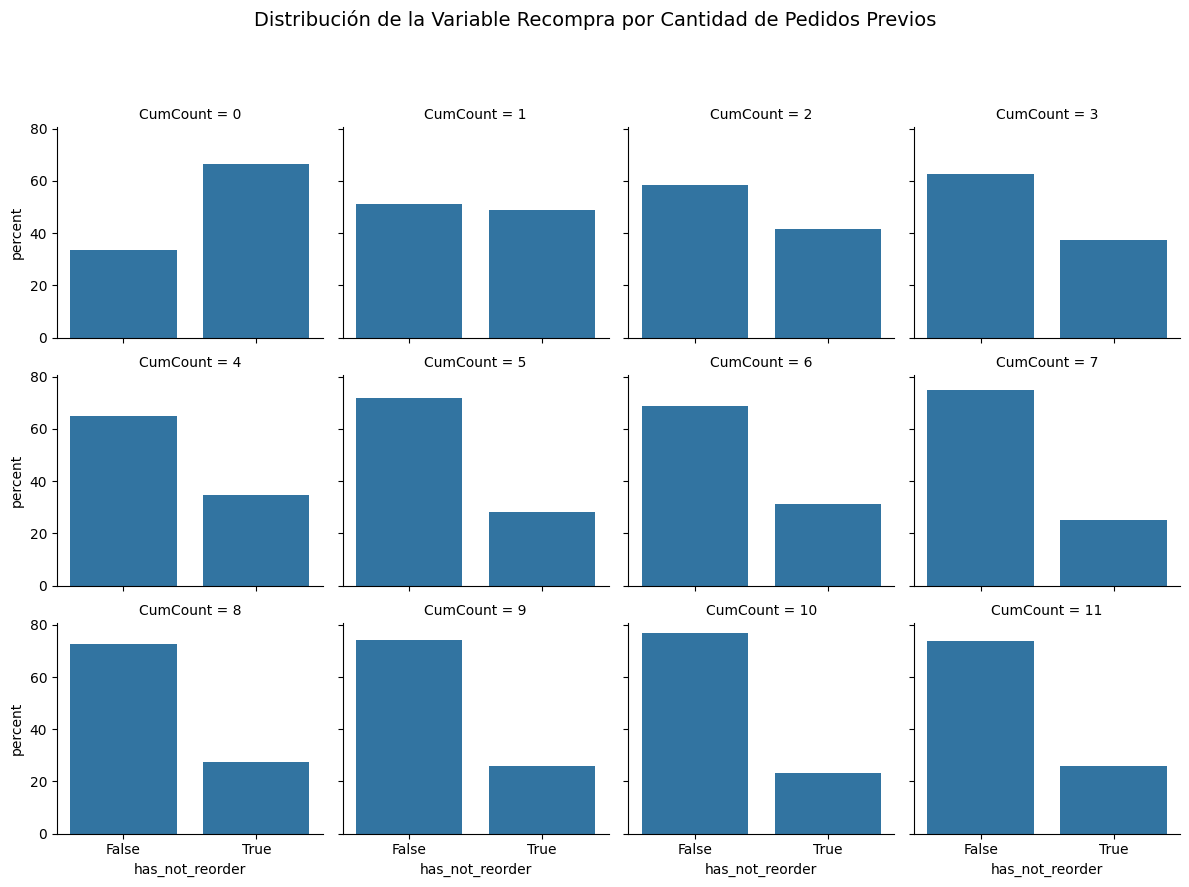

In [ ]:
g = sns.FacetGrid(df_filtered, col="CumCount", col_wrap=4, sharey=True)
g.map(sns.countplot, "has_not_reorder", order=[False, True], stat='percent')

# Labeling
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Distribución de la Variable Recompra por Cantidad de Pedidos Previos", fontsize=14)

# Set x and y labels correctly


plt.show()


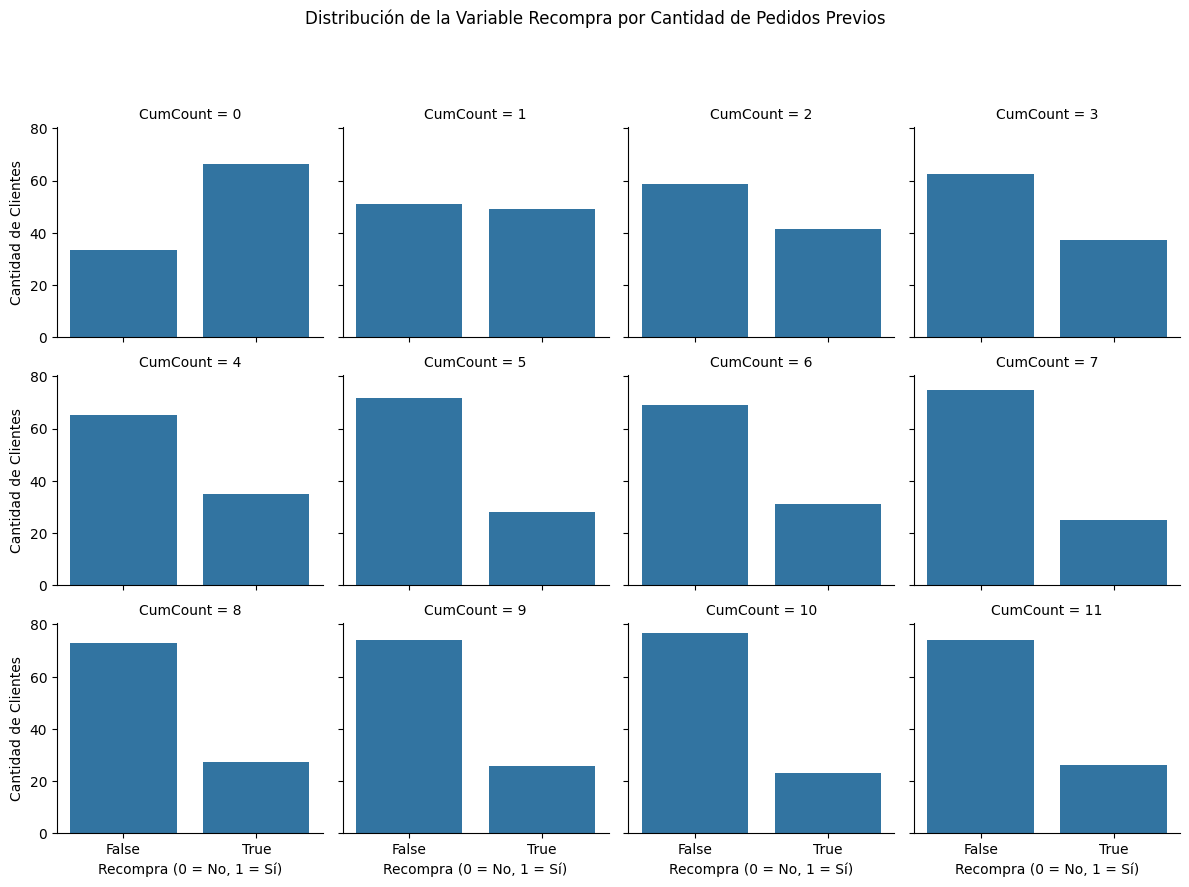

In [ ]:
g = sns.FacetGrid(df_filtered, col="CumCount", col_wrap=4, sharey=True)
g.map(sns.countplot, "has_not_reorder", order=[False, True], stat = 'percent')

# Labeling
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Distribución de la Variable Recompra por Cantidad de Pedidos Previos")
g.set_axis_labels("Recompra (0 = No, 1 = Sí)", "Porcentaje de Clientes")
for ax in g.axes.flatten():
    ax.set_xlabel("Recompra (0 = No, 1 = Sí)")
    ax.set_ylabel("Cantidad de Clientes")

plt.show()

In [ ]:
# Convertir la columna a string para evitar errores
df['Distance'] = df['Distance'].astype(str)

# Reemplazar '<1km' por '0.5'
df['Distance'] = df['Distance'].replace('<1km', '0.5')

# Eliminar 'km' y convertir a float
df['Distance'] = df['Distance'].str.replace('km', '').astype(float)

# Verificar los cambios
print(df['Distance'].head())
df['Distance'].value_counts().reset_index()





584    3.0
835    2.0
834    8.0
127    2.0
833    6.0
Name: Distance, dtype: float64


,Distance,count
0,2.0,3558
1,1.0,3346
2,3.0,3212
3,4.0,2410
4,5.0,2140
5,6.0,2112
6,7.0,1282
7,9.0,767
8,8.0,709
9,0.5,649


In [ ]:
df['Cantidad_Productos'] = df['Items in order'].apply(lambda x: sum(int(i.split('x')[0].strip()) for i in str(x).split(',')))
df.dtypes['Cantidad_Productos']
df['Cantidad_Productos'].value_counts().reset_index().sort_values(by='Cantidad_Productos',ascending=False)


,Cantidad_Productos,count
18,29,1
16,26,1
13,20,3
15,17,1
17,16,1
12,15,3
14,14,2
10,12,9
11,11,4
8,10,18


In [ ]:
df['Ticket_Promedio'] = df['Total'] / df['Cantidad_Productos']
df.shape

(21321, 34)

In [ ]:
df['Customer complaint tag'].value_counts().reset_index() #No vale la pena trabajar esta OK

,Customer complaint tag,count
0,Non-refunded complaint,157
1,Poor taste or quality,120
2,Poor packaging or spillage,104
3,Wrong item(s) delivered,48
4,Item(s) missing or not delivered,40


# Data Split

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['has_not_reorder'], random_state=42)

train_df['has_not_reorder'].value_counts().reset_index()


,has_not_reorder,count
0,True,9285
1,False,7771


In [ ]:
test_df['has_not_reorder'].value_counts().reset_index()

,has_not_reorder,count
0,True,2322
1,False,1943


# Data Transform

In [ ]:
from sklearn.preprocessing import StandardScaler

# Seleccionar solo columnas numéricas
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar en train y transformar en train
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])


# Verificar la normalización
train_df.select_dtypes(include=['int64', 'float64']).head()


,Restaurant ID,Order ID,Distance,Bill subtotal,Packaging charges,Restaurant discount (Promo),"Restaurant discount (Flat offs, Freebies & others)",Gold discount,Brand pack discount,Total,Rating,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),CumCount,orders_after,Cantidad_Productos,Ticket_Promedio
4497,-0.441773,-0.990017,0.614430,-0.897305,-0.792346,-0.752374,-0.237447,-0.028981,-0.177013,-0.792129,NaN,NaN,NaN,-1.735742,-0.744551,-0.153237,1.010816,0.052258,-1.296135
19529,0.567914,1.498217,1.954482,0.005456,0.226518,-0.752374,-0.237447,-0.028981,-0.177013,0.229977,NaN,NaN,NaN,0.068809,-0.543689,-0.445326,-0.445748,0.052258,0.117883
11293,1.758369,-0.046757,-1.060636,-0.915083,-0.812411,-0.752374,-0.237447,-0.028981,-0.177013,-0.812258,NaN,NaN,NaN,-0.388683,-0.583861,0.138852,0.136877,0.052258,-1.323982
12374,-0.342980,0.170072,-0.725623,-0.146650,-0.168097,0.402419,-0.237447,-0.028981,-0.177013,-0.165893,NaN,NaN,NaN,-0.217123,-0.764637,-0.445326,0.719503,-0.793384,1.358629
17152,1.640651,0.978581,3.629547,-0.105167,0.413347,-0.752374,-0.237447,-0.028981,-0.177013,0.119619,NaN,NaN,NaN,0.469114,-0.844982,-0.153237,-0.445748,-0.793384,2.148605
